In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [7]:
#input data
data = pd.read_csv("student.csv")
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [40]:
#total number of rows and columns
data.shape

(1000, 10)

In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
data['math score'].head(5)

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [10]:
#new cols - total score & percentage
data['Total score'] = data['math score']+data['reading score']+data['writing score']
data['Percentage'] = (data['Total score']/3).round(2)

In [11]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [12]:
#check for missing values - all 0 means no Null values; else, that many rows has Null values
print(data.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Total score                    0
Percentage                     0
dtype: int64


In [13]:
#taking count
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [14]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [17]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [18]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [19]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [20]:
##Analysis
# gender                         - No of females is greater than males
# race/ethnicity                 - Majority of people are from Group C whereas A has the least 
# parental level of education    - Only 59 parents have masters degree where Most of the others have educated from some college.
# lunch                          - 2/3rd of the people takes lunch at standard rates.
# test preparation course        - Only 1/3rd of students took the taken preparation course. The rest haven't.

In [22]:
#separating dataset as male and female
male = data[data['gender']=='male']
female = data[data['gender']=='female']

In [23]:
male.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Percentage
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33
7,male,group B,some college,free/reduced,none,40,43,39,122,40.67
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.00
10,male,group C,associate's degree,standard,none,58,54,52,164,54.67


In [24]:
female.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
5,female,group B,associate's degree,standard,none,71,83,78,232,77.33
6,female,group B,some college,standard,completed,88,95,92,275,91.67


In [33]:
#printing scores by using sum
print(f"{'*'*5} Math Scores {'*'*5}")
print(f"Males: ", round(male['math score'].sum()/len(male),3))
print("Females: {:.3f}".format(female['math score'].sum()/len(female)))

***** Math Scores *****
Males:  68.728
Females: 63.633


In [34]:
print(f"{'*'*5} Reading Scores {'*'*5}")
print(f"Males: ", round(male['reading score'].sum()/len(male),3))
print("Females: {:.3f}".format(female['reading score'].sum()/len(female)))

***** Reading Scores *****
Males:  65.473
Females: 72.608


In [35]:
print(f"{'*'*5} Writing Scores {'*'*5}")
print(f"Males: ", round(male['writing score'].sum()/len(male),3))
print("Females: {:.3f}".format(female['writing score'].sum()/len(female)))

***** Writing Scores *****
Males:  63.311
Females: 72.467


In [39]:
#using mean function
mean_score = round(data.groupby('gender')['math score'].mean(),3)
mean_score

gender
female    63.633
male      68.728
Name: math score, dtype: float64

In [42]:
#finding top performance - method 1 using nlargest
top_score = data['Total score'].nlargest(5)
top_score

458    300
916    300
962    300
114    299
179    297
Name: Total score, dtype: int64

In [43]:
#finding top performance - method 2 by sorting
print(data.sort_values(['Total score'], ascending = False).head(5))

     gender race/ethnicity parental level of education     lunch  \
916    male        group E           bachelor's degree  standard   
458  female        group E           bachelor's degree  standard   
962  female        group E          associate's degree  standard   
114  female        group E           bachelor's degree  standard   
179  female        group D            some high school  standard   

    test preparation course  math score  reading score  writing score  \
916               completed         100            100            100   
458                    none         100            100            100   
962                    none         100            100            100   
114               completed          99            100            100   
179               completed          97            100            100   

     Total score  Percentage  
916          300      100.00  
458          300      100.00  
962          300      100.00  
114          299       99.67

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   Total score                  1000 non-null   int64  
 9   Percentage                   1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


In [59]:
#finding top performance - method 3 by merging & sorting using Pandas
top_score = pd.DataFrame(data['math score'] + data['reading score'] + data['writing score'], columns = ['Total Score'])

# Merge the 'top_score' DataFrame with the original DataFrame
merged_data = pd.merge(data, top_score, left_index=True, right_index=True)

# Sort the merged DataFrame by 'Total score' in descending order
sorted_data = merged_data.sort_values(by=['Total Score'], ascending=False)

# Display the sorted DataFrame
sorted_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Percentage,Total Score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.00,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.00,300
962,female,group E,associate's degree,standard,none,100,100,100,300,100.00,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.67,299
179,female,group D,some high school,standard,completed,97,100,100,297,99.00,297
...,...,...,...,...,...,...,...,...,...,...,...
76,male,group E,some high school,standard,none,30,26,22,78,26.00,78
327,male,group A,some college,free/reduced,none,28,23,19,70,23.33,70
596,male,group B,high school,free/reduced,none,30,24,15,69,23.00,69
980,female,group B,high school,free/reduced,none,8,24,23,55,18.33,55


### Seaborn

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
sns.set(style="whitegrid") #or darkgrid as bg

<Axes: xlabel='race/ethnicity', ylabel='count'>

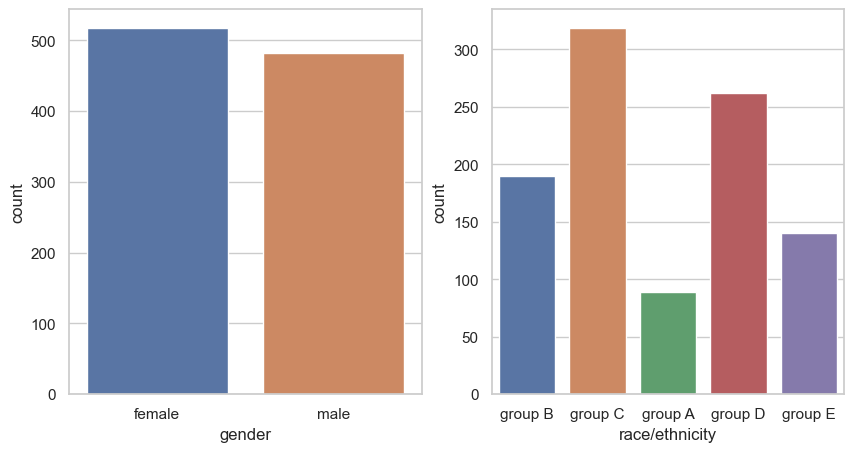

In [80]:
# 1*2 subplots
fi, axs = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(x='gender', data=data, ax=axs[0])
sns.countplot(x='race/ethnicity', data=data, ax=axs[1])

<Axes: xlabel='test preparation course', ylabel='count'>

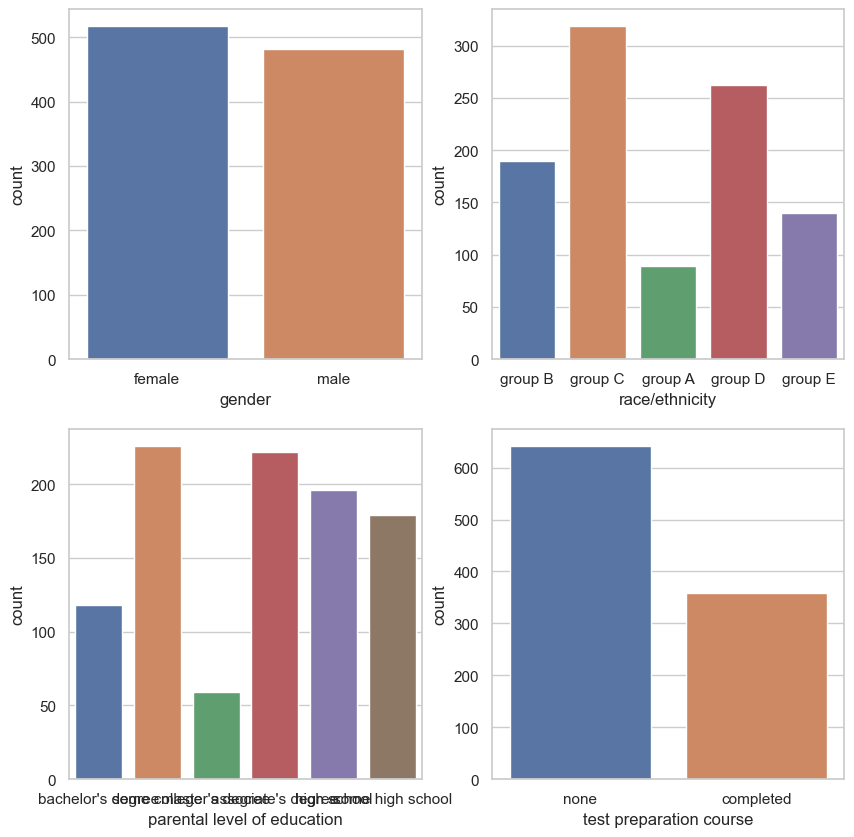

In [81]:
# 2*2 subplots
fi, axs = plt.subplots(2, 2, figsize=(10,10))
sns.countplot(x='gender', data=data, ax=axs[0,0])
sns.countplot(x='race/ethnicity', data=data, ax=axs[0,1])
sns.countplot(x='parental level of education', data=data, ax=axs[1,0])
sns.countplot(x='test preparation course', data=data, ax=axs[1,1])

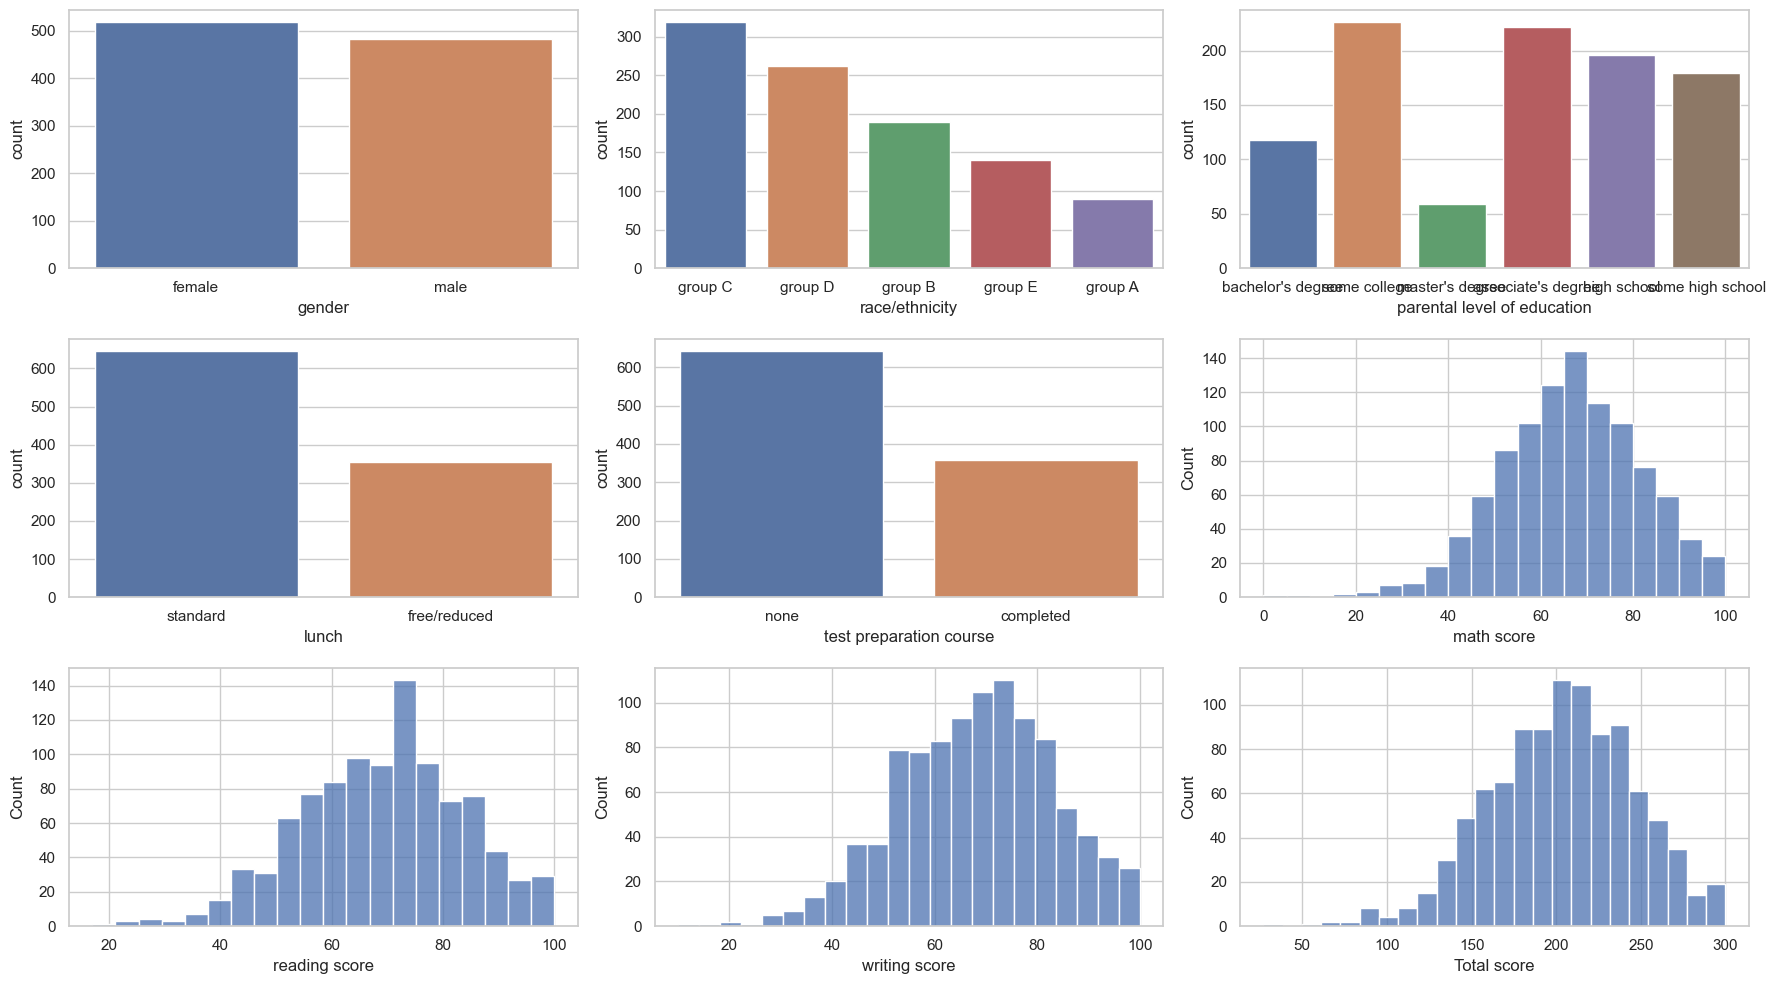

In [88]:
# 3*3 subplots
fi, axs = plt.subplots(3, 3, figsize=(18,10))
sns.countplot(x='gender', data=data, ax=axs[0,0])
sns.countplot(x='race/ethnicity', data=data, ax=axs[0,1], order=data['race/ethnicity'].value_counts().index)
sns.countplot(x='parental level of education', data=data, ax=axs[0,2])
sns.countplot(x='lunch', data=data, ax=axs[1,0])
sns.countplot(x='test preparation course', data=data, ax=axs[1,1])
#cant use bar charts for 
sns.histplot(data['math score'], ax=axs[1, 2], bins=20)
sns.histplot(data['reading score'], ax=axs[2, 0], bins=20)
sns.histplot(data['writing score'], ax=axs[2, 1])
sns.histplot(data['Total score'], ax=axs[2, 2])

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

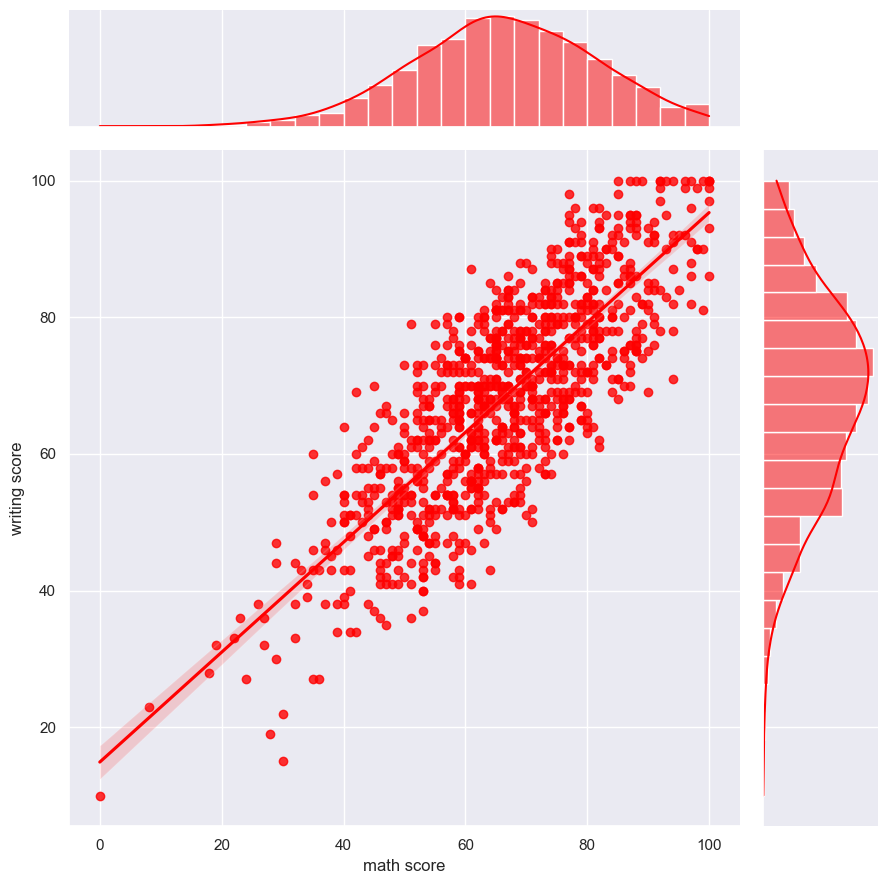

In [12]:
sns.jointplot(x='math score', y='writing score', data=data, color='red', height=9, kind='reg')

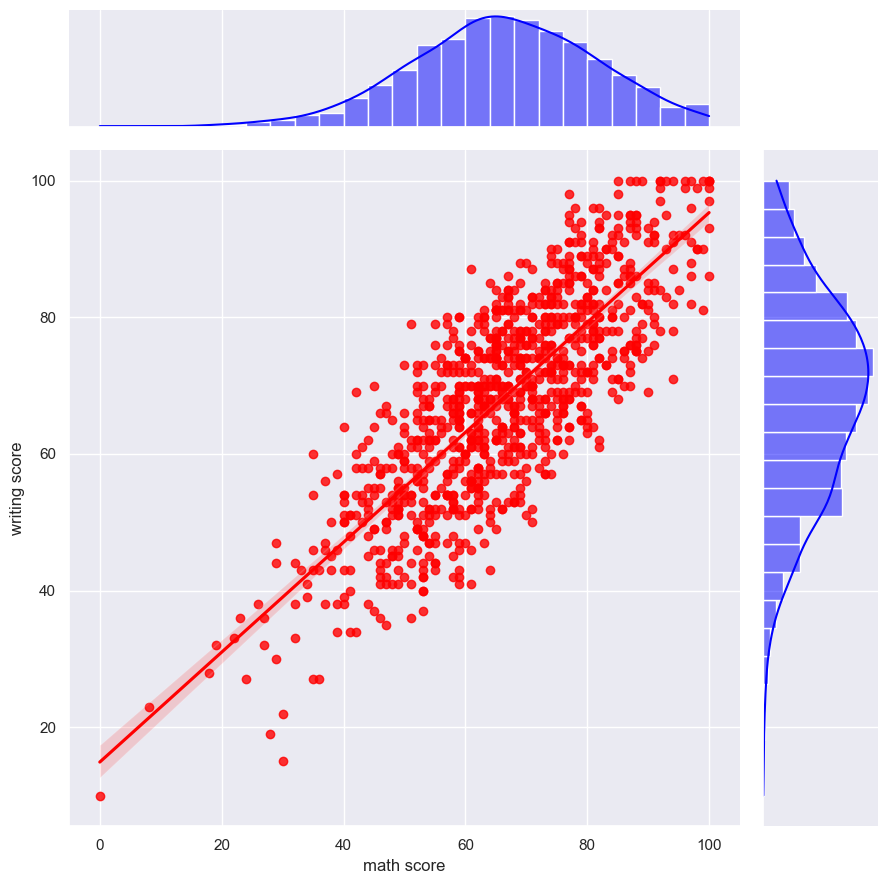

In [20]:
sns.jointplot(x='math score', y='writing score', data=data, color='red', height=9, kind='reg', marginal_kws={'color':'red','color':'blue'})

### Pie Charts

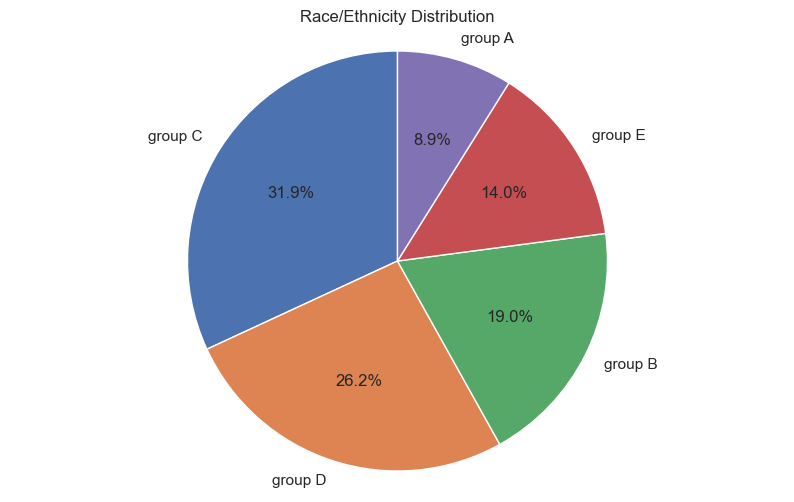

In [22]:
race_count = data['race/ethnicity'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(race_count, labels=race_count.index, autopct="%1.1f%%", startangle=90)
plt.axis('equal')
plt.title("Race/Ethnicity Distribution")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14788\1738594488.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='crest')


<Axes: >

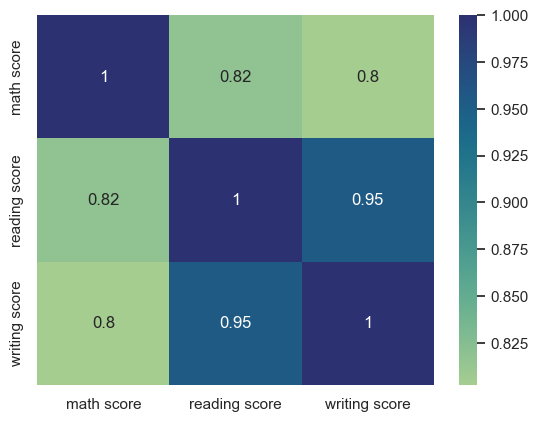

In [27]:
sns.heatmap(data.corr(), annot=True, cmap='crest')